In [1]:
import pandas as pd
import numpy as np


In [2]:
df = pd.read_csv("spam.csv", encoding = 'latin-1')

# Drop the extra columns and rename columns

df = df.drop(labels = ["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis = 1)
df.columns = ["category", "text"]

In [3]:
df

,category,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [4]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [5]:
df['category'] = encoder.fit_transform(df['category'])

In [6]:
df.isnull().sum()

category    0
text        0
dtype: int64

In [7]:
df.duplicated().sum()

403

In [8]:
df.drop_duplicates()

,category,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [9]:
# EDA

import nltk

In [19]:
nltk.download('punkt')

[nltk_data] Error loading punkt: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:997)>


False

In [11]:
df['num_characters'] = df['text'].apply(len)

In [12]:
df.head()

,category,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [13]:
df['category'].value_counts()

0    4825
1     747
Name: category, dtype: int64

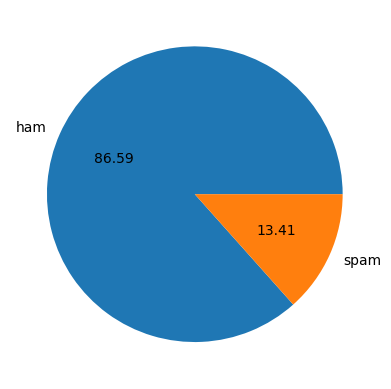

In [14]:
import matplotlib.pyplot as plt
plt.pie(df['category'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [15]:
df['num_characters'] = df['text'].apply(len)

In [16]:

df

,category,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161
5568,0,Will Ì_ b going to esplanade fr home?,37
5569,0,"Pity, * was in mood for that. So...any other s...",57
5570,0,The guy did some bitching but I acted like i'd...,125


In [20]:
# df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))


In [ ]:
# df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [55]:
nltk.download('punkt')

[nltk_data] Error loading punkt: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:997)>


False

In [ ]:
###   Data Preprocessing
Lower case
Tokenization
Removing special characters
Removing stop words and punctuation
Stemming

In [37]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    y =[]
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i) 

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))               

    return " ".join(y)

In [25]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [29]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [39]:
# df['transformed_text'] = df['text'].apply(transform_text)

In [40]:
# Model building

from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer

In [54]:
# x = cv.fit_transform(df['transformed_text']).toarray

In [48]:
y = df['category'].values

In [49]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [ ]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [ ]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [ ]:
gnb.fit(x_train,y_train)
y_pred1 = gnb.predict(x_test)
print(accuracy_score(y_test,y_pred1))

In [ ]:
mnb.fit(x_train,y_train)
y_pred2 = mnb.predict(x_test)
print(accuracy_score(y_test,y_pred2))

In [ ]:
bnb.fit(x_train,y_train)
y_pred3 = bnb.predict(x_test)
print(accuracy_score(y_test,y_pred3))